In [1]:
##############################################################################################################
# DESCRIPTION: 
#              
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/256/0100_1000/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 256
hyperparams.IMG_HEIGHT = 256
hyperparams.EPOCHS = 600 #10000
hyperparams.BATCH_SIZE = 16
hyperparams.START_NEURONS = 8 # UNET
hyperparams.LOSS = 'mean_squared_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
MODEL_NAME = "0100_1000-256-unet-d"

#DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))


class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

#from tensorflow.keras.optimizers import Adam
#hyperparams.OPTIMIZER = Adam(learning_rate=0.0001)
from tensorflow.keras.optimizers import Nadam
hyperparams.OPTIMIZER = Nadam(learning_rate=0.00001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelC as train
import ReportsK as reports
#import UnetI_H as model_factory
import UnetF as model_factory

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6242377087328791228
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5722079232
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4482586240907496883
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
]
Tensorflow version: 2.6.0
Keras Version: 2.6.0
GPU is available


In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
##################
# MODEL DEFINITION
##################

model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 8)  80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 8)  584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 8)  0           conv2d_1[0][0]                   
______________________________________________________________________________________________

{'name': 'Nadam',
 'learning_rate': 1e-05,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [7]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/256/0100_1000/
Noisy files:606
Nitid files:606
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/256/0100_1000/validation/
Noisy files:148
Nitid files:148


In [8]:
##################
# TRAIN MODEL
##################
#import tensorflow as tf
#from tensorflow.compat.v1.keras.backend import set_session
#config = tf.compat.v1.ConfigProto()
#config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
#config.log_device_placement = True  # to log device placement (on which device the operation ran)
#sess = tf.compat.v1.Session(config=config)
#set_session(sess)


hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 500 )

Epoch 1/600
38/38 [==============================] - 12s 153ms/step - loss: 0.1412 - mean_squared_error: 0.1412 - val_loss: 0.1313 - val_mean_squared_error: 0.1313
Epoch 2/600
38/38 [==============================] - 4s 97ms/step - loss: 0.1402 - mean_squared_error: 0.1402 - val_loss: 0.1300 - val_mean_squared_error: 0.1300
Epoch 3/600
38/38 [==============================] - 4s 97ms/step - loss: 0.1382 - mean_squared_error: 0.1382 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 4/600
38/38 [==============================] - 4s 97ms/step - loss: 0.1200 - mean_squared_error: 0.1200 - val_loss: 0.0883 - val_mean_squared_error: 0.0883
Epoch 5/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0562 - mean_squared_error: 0.0562 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 6/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 7/600
38/38 [=======

38/38 [==============================] - 4s 99ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 52/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 53/600
38/38 [==============================] - 4s 99ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 54/600
38/38 [==============================] - 4s 96ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 55/600
38/38 [==============================] - 4s 99ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 56/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 57/600
38/38 [===============

38/38 [==============================] - 4s 98ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 102/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 103/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 104/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 105/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 106/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 107/600
38/38 [=========

38/38 [==============================] - 4s 98ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 152/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 153/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 154/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 155/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 156/600
38/38 [==============================] - 4s 98ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 157/600
38/38 [=========

Epoch 201/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 202/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 203/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 204/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 205/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 206/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 207/

Epoch 251/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 252/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 253/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 254/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 255/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 256/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 257/

Epoch 301/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 302/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 303/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 304/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 305/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 306/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 307/

Epoch 351/600
38/38 [==============================] - 7s 185ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 352/600
38/38 [==============================] - 7s 182ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 353/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 354/600
38/38 [==============================] - 7s 182ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 355/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 356/600
38/38 [==============================] - 7s 186ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 357/

Epoch 401/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 402/600
38/38 [==============================] - 7s 182ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 403/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 404/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 405/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 406/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 407/

Epoch 451/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 452/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 453/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 454/600
38/38 [==============================] - 7s 182ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 455/600
38/38 [==============================] - 7s 182ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 456/600
38/38 [==============================] - 7s 181ms/step - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 457/

Epoch 501/600
38/38 [==============================] - 7s 177ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 502/600
38/38 [==============================] - 7s 177ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 503/600
38/38 [==============================] - 7s 177ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 504/600
38/38 [==============================] - 7s 182ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 505/600
38/38 [==============================] - 7s 179ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 506/600
38/38 [==============================] - 7s 179ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 507/

Epoch 551/600
38/38 [==============================] - 7s 177ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 552/600
38/38 [==============================] - 7s 177ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 553/600
38/38 [==============================] - 7s 177ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 554/600
38/38 [==============================] - 7s 177ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 555/600
38/38 [==============================] - 7s 177ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 556/600
38/38 [==============================] - 7s 177ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 557/

Train size:606
Valid.size:148
--- 3562.1351068019867 seconds ---


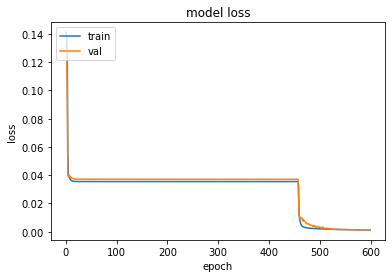

In [9]:
##################
# REPORTS
##################

reports.plotHistory( hist )

In [10]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-256-unet-d\assets
